# Political Science 3 Lecture J: Bivariate Regression
Professor: Jason Wittenberg  
Authors: Eric Van Dusen, William McEachen

## Agenda
1) **TODO**

In [53]:
import numpy as np
from scipy import stats
# from datascience import Table
import pandas as pd
from ipywidgets import *
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display, Markdown
%matplotlib inline

## Linear Models:
When we have two continuous variables (one dependent, one independent), we can use *bivariate regression* to determine how closely the two are related. Biviarate regression is used to determine how changes in one variable -- the independent variable, often denoted $X$ -- can predict changes in another, the dependent variable, often denoted $y$. Bivariate regression relies on a linear model, which follows the form $ y= \alpha + \beta X$, where $\alpha$ is the y-intercept and $\beta$ is the slope. 

If we assume that the relationship between our variables is not perfect (or, in the real world, if there is some predictable inaccuracy in our measurement), we add an error term $\epsilon$: $ y= \alpha + \beta X + \epsilon$. 

## Motivating Ordinary Least Squares

To understand how we might create an equation for two variables, let's consider the relationship between GDP growth and incumbent vote share (from Lecture I). Let's load in the data table where the GROWTH column represents GDP growth and the VOTE column represents incumbent vote share.

In [54]:
fair_df = pd.read_csv('data/fair.csv')
fair_df

,YEAR,VOTE,PARTY,PERSON,DURATION,WAR,GROWTH,INFLATION,GOODNEWS
0,1880,50.220,-1,0,1.75,0,3.879,1.974,9
1,1884,49.846,-1,0,2.00,0,1.589,1.055,2
2,1888,50.414,1,1,0.00,0,-5.553,0.604,3
3,1892,48.268,-1,1,0.00,0,2.763,2.274,7
4,1896,47.760,1,0,0.00,0,-10.024,3.410,6
5,1900,53.171,-1,1,0.00,0,-1.425,2.548,7
6,1904,60.006,-1,0,1.00,0,-2.421,1.442,5
7,1908,54.483,-1,0,1.25,0,-6.281,1.879,8
8,1912,54.708,-1,1,1.50,0,4.164,2.172,8
9,1916,51.682,1,1,0.00,0,2.229,4.252,3


Now we can plot these variables:
*Review*: Why is GDP growth our independent variable (represented on the x-axis)?

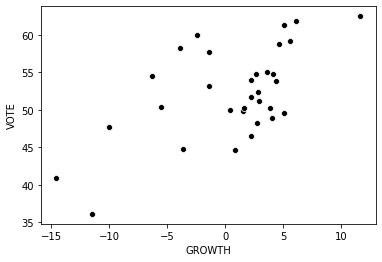

In [55]:
sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')

Above, it appears that as GROWTH increases (as we move further to the right on the x-axis), VOTE also increases. If we wanted to use this data to make future predictions, we could use a linear model to represent the variables' relationship. Below, you can change the slope and intercept of the line to best fit the data:

In [63]:
def draw_line(slope, intercept):
    #The Linear Model
    def f(x):
        return intercept*(slope-1)/30*x +intercept
    x = np.arange(-15,15)
    y_pred = f(x)
    points = (zip(fair_df.GROWTH, fair_df.VOTE))
    #The line
    plt.plot(x,y_pred)
    #The actual data
    sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')
    plt.xlabel('GDP Growth per Capita')
    plt.ylabel('Incumbent Vote Share')
    display(Markdown(rf'$\hat y$= {slope}$X$ + {intercept}:'))
    #Print the loss
    print("Square Residual Sum:", sum([(y-f(x))**2 for x,y in points]))
    print("Absolute Residual Sum:", sum([abs(y-f(x))for x, y in points]))
    
interact(draw_line, slope=(0.0,3), intercept=(30,70))


interactive(children=(FloatSlider(value=1.5, description='slope', max=3.0), IntSlider(value=50, description='i…

<function __main__.draw_line(slope, intercept)>

### What line is best?
When we are evaulating how "good" a line is, we must address the *residuals*, the difference between the real and predicted values of y: $u_i = Y_i - \hat{Y_i}$. Because every real y value has an associated residual, we need some way to aggregate the residuals if we are to measure the overall quality of a line

#### Absolute value
One measurement of loss is calculated by adding the absolute value of the residuals together:
$$\sum_{i=1}^n |u_i| = \sum_{i=1}^n |Y_i - \hat{Y_i}|$$

#### Squared error:
Another measurement is the *squared error*, calculated by adding the squared values of the residuals:
$$\sum_{i=1}^n |u_i^2| = \sum_{i=1}^n (Y_i-\hat{Y_i})^2$$

For either measurement, we want the line that results in the smallest value (indicating that the total difference between the predicted and actual values is small). Below, try to minimize either the absolute or squared loss:

In [75]:
def draw_line(slope, intercept):
    #The Linear Model
    def f(x):
        return intercept*(slope-1)/30*x +intercept
    x = np.arange(-15,15)
    y_pred = f(x)
    #The line
    plt.plot(x,y_pred)
    #The actual data
    sns.scatterplot('GROWTH', 'VOTE', data=fair_df, color='black')
    plt.xlabel('GDP Growth per Capita')
    plt.ylabel('Incumbent Vote Share')
    display(Markdown(rf'$\hat y$= {slope}$X$ + {intercept}:'))
    #Print the loss
    print("Square Residual Sum:", sum([(y-f(x))**2 for x,y in zip(fair_df.GROWTH, fair_df.VOTE)]))
    print("Absolute Residual Sum:", sum([abs(y-f(x))for x, y in zip(fair_df.GROWTH, fair_df.VOTE)]))
    
interact(draw_line, slope=(0.0,3), intercept=(30,70))

interactive(children=(FloatSlider(value=1.5, description='slope', max=3.0), IntSlider(value=50, description='i…

<function __main__.draw_line(slope, intercept)>

What's the smallest squared error/absolute error you can produce?

## Ordinary Least Squares
Statisticians prefer to use the line that minimizes the squared residuals. To find the slope ($\beta$) and y-intercept ($\alpha$), the following equations are used:
$$\beta = \frac{\sum_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})}{\sum_{i=1}^n (X_i - \overline{X})^2}$$
$$\alpha = \overline{Y}-\beta\overline{X}$$
*Reminder*: $\overline{X}$ represents the mean value of X.

### Using Python:
To calculate 

In [34]:
# sm.OLS('VOTE ~ GROWTH', data=fair_df).fit().summary()
sm.OLS(fair_df.VOTE,fair_df.GROWTH).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   VOTE   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.050
Date:                Sat, 17 Aug 2019   Prob (F-statistic):                       0.314
Time:                        11:51:11   Log-Likelihood:                         -171.69
No. Observations:                  32   AIC:                                      345.4
Df Residuals:                      31   BIC:                                      346.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GROWTH         1.7350      1.693      1.025      0.314      -1.719       5.189
==============================================================================
Omnibus:                        3.758   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.344
Skew:                           0.722   Prob(JB):                        0.188
Kurtosis:                       2.349   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LinregressResult(slope=1.779200618070273, intercept=0.4207269312456762, rvalue=0.8649546005174281, pvalue=0.0012323195296654373, stderr=0.3649729209423389)

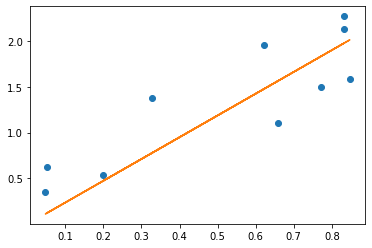

In [78]:
x = np.random.random(10)
y = 1.6*x + np.random.random(10)
plt.plot(x,y, 'o', label='original data')
results = sm.OLS(y, x).fit().predict(x)
plt.plot(x, results)
stats.linregress(x, y)